## Visualization of a Hypothetical 2D Loss Landscape and Gradient Descent

In this notebook, we will visualize a hypothetical 2D loss landscape and then demonstrate the path of gradient descent on this landscape.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define the Hypothetical Loss Landscape

The function `loss_landscape` represents our hypothetical loss landscape. We will generate a 2D grid and visualize this landscape using a contour plot.

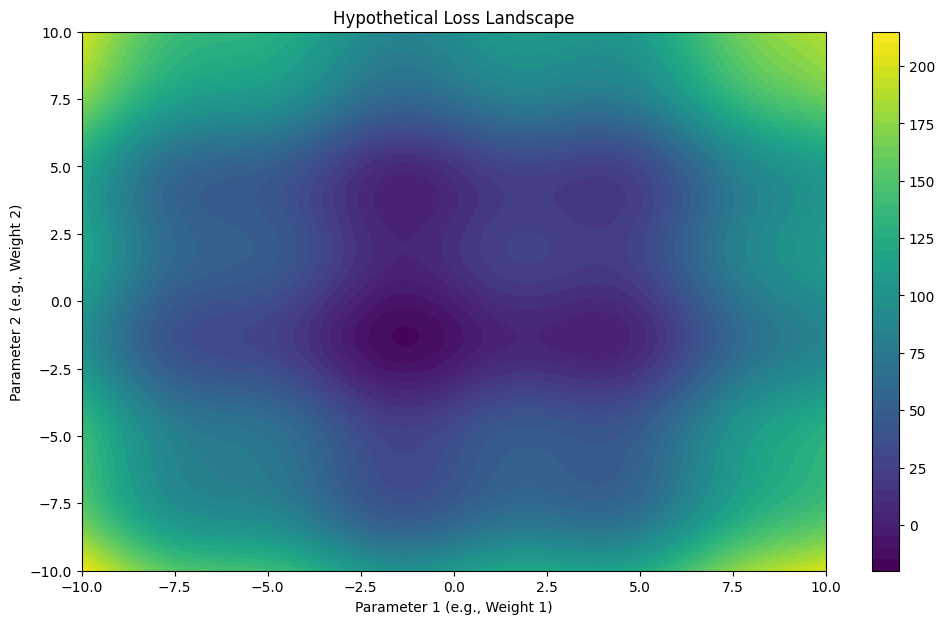

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def loss_landscape(x, y):
    return x**2 + y**2 + 10*np.sin(x) + 10*np.sin(y)

x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

X, Y = np.meshgrid(x, y)
Z = loss_landscape(X, Y)

plt.figure(figsize=(12,7))
plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar()
plt.title('Hypothetical Loss Landscape')
plt.xlabel('Parameter 1 (e.g., Weight 1)')
plt.ylabel('Parameter 2 (e.g., Weight 2)')
plt.show()


### Gradient Computation and Gradient Descent

We define the gradient of the loss landscape and a function to perform 2D gradient descent. Following this, we visualize the gradient descent path on the loss landscape.

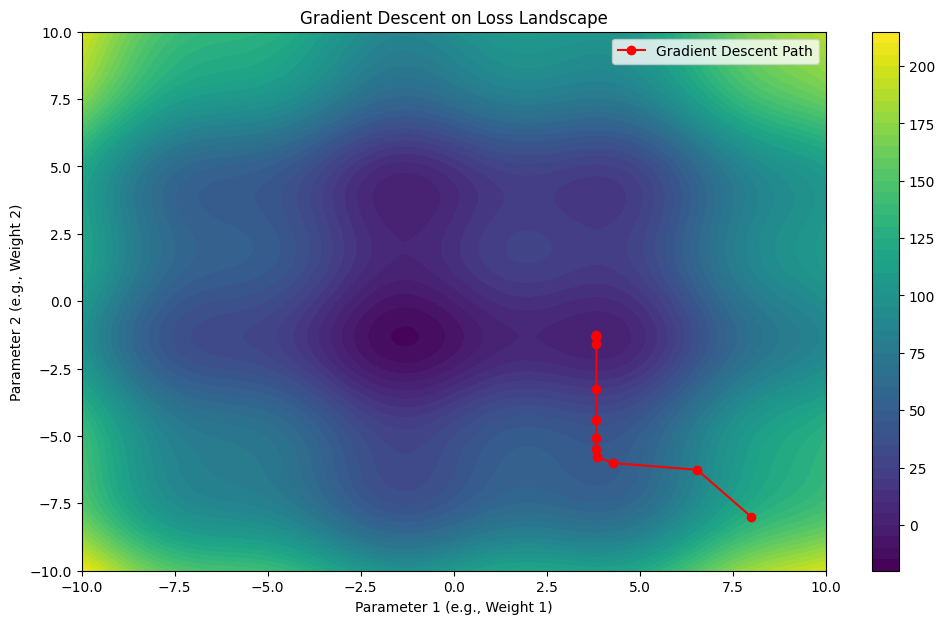

In [3]:
def gradient_loss_landscape(point):
    x, y = point
    dfdx = 2*x + 10*np.cos(x)
    dfdy = 2*y + 10*np.cos(y)
    return np.array([dfdx, dfdy])

def gradient_descent_2D(starting_point, learning_rate, n_iterations):
    path = [starting_point]
    current_point = np.array(starting_point)
    
    for i in range(n_iterations):
        gradient_at_point = gradient_loss_landscape(current_point)
        current_point = current_point - learning_rate * gradient_at_point
        path.append(list(current_point))
        
    return np.array(path)


path = gradient_descent_2D([8, -8], 0.1, 20)

plt.figure(figsize=(12,7))
plt.contourf(X, Y, Z, 50, cmap='viridis')
plt.colorbar()
plt.plot(path[:,0], path[:,1], '-o', color='red', label='Gradient Descent Path')
plt.title('Gradient Descent on Loss Landscape')
plt.xlabel('Parameter 1 (e.g., Weight 1)')
plt.ylabel('Parameter 2 (e.g., Weight 2)')
plt.legend()
plt.show()


### 3D Visualization of the Loss Landscape

Next, we visualize the same loss landscape in a 3D perspective.

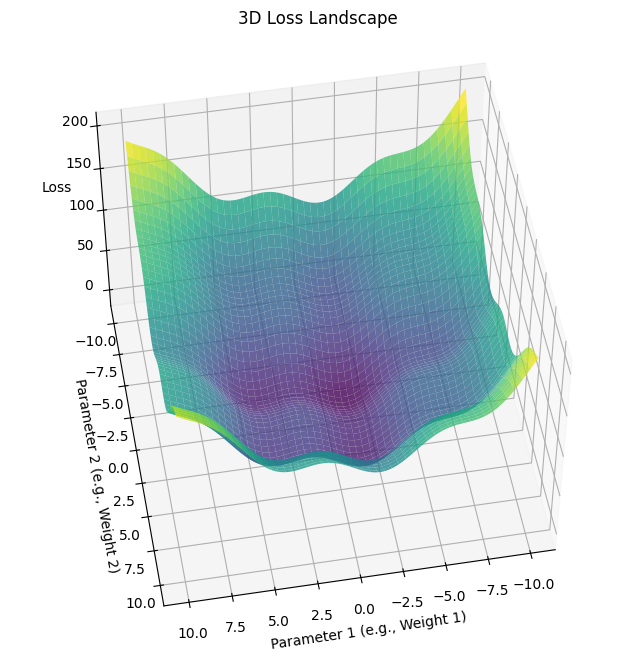

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('3D Loss Landscape')
ax.set_xlabel('Parameter 1 (e.g., Weight 1)')
ax.set_ylabel('Parameter 2 (e.g., Weight 2)')
ax.set_zlabel('Loss')

ax.view_init(50, 80) 

plt.show()


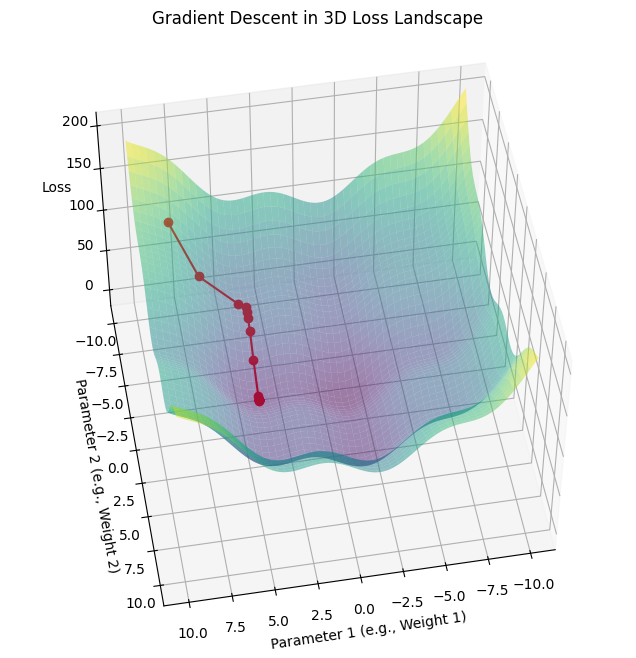

In [5]:
path = gradient_descent_2D([8, -8], 0.1, 20)
z_path = loss_landscape(path[:, 0], path[:, 1])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.plot(path[:, 0], path[:, 1], z_path, '-o', color='red', label='Gradient Descent Path')
ax.set_title('Gradient Descent in 3D Loss Landscape')
ax.set_xlabel('Parameter 1 (e.g., Weight 1)')
ax.set_ylabel('Parameter 2 (e.g., Weight 2)')
ax.set_zlabel('Loss')
ax.view_init(50, 80) 

plt.show()


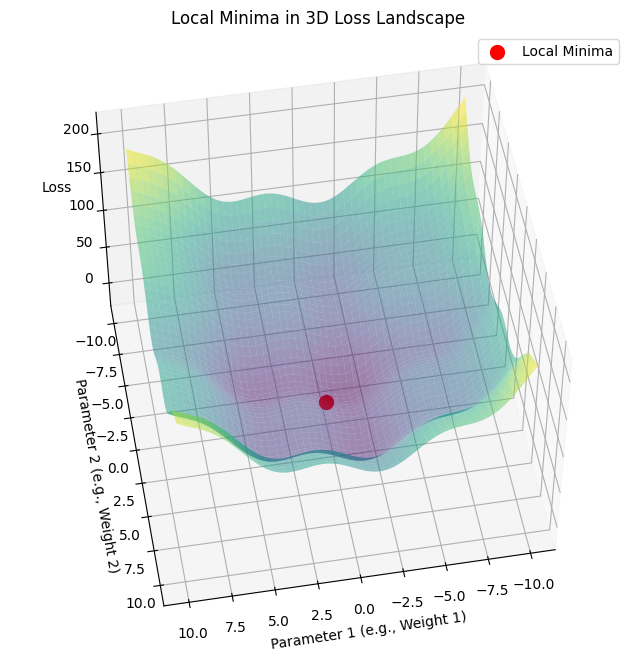

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(0, 0, loss_landscape(0, 0), color='red', s=100, label='Local Minima')  # Highlighting a local minimum
ax.set_title('Local Minima in 3D Loss Landscape')
ax.set_xlabel('Parameter 1 (e.g., Weight 1)')
ax.set_ylabel('Parameter 2 (e.g., Weight 2)')
ax.set_zlabel('Loss')
ax.legend()

ax.view_init(50, 80) 

plt.show()
